Задания 1.1 и 1.2:

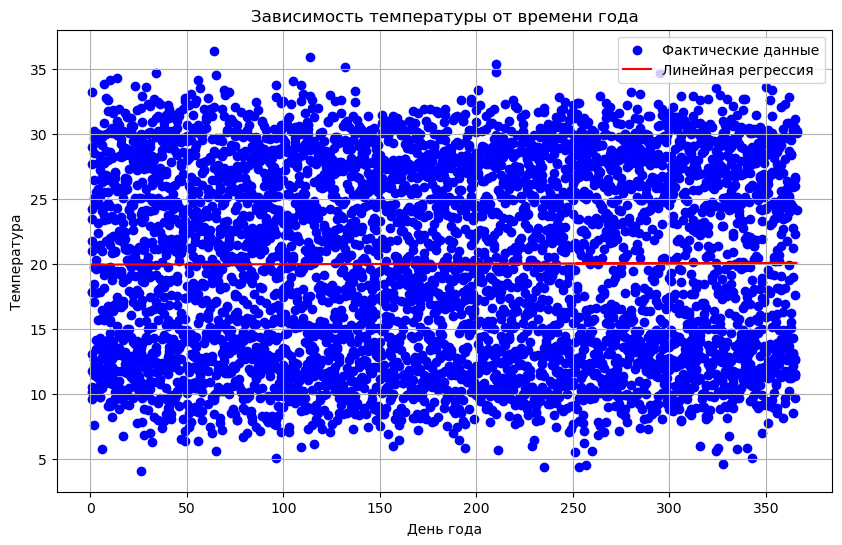

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Загрузка данных
data = pd.read_csv('weather_data.csv')

# Преобразование дат в числовой формат (день года)
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfYear'] = data['Date'].dt.dayofyear

# Выделяем признаки (день года) и целевую переменную (температура)
X = data['DayOfYear'].values.reshape(-1, 1)
y = data['Temperature'].values

# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Построение графика
plt.figure(figsize=(10, 6))

# Данные
plt.scatter(data['DayOfYear'], y, color='blue', label='Фактические данные')

# Линия регрессии
plt.plot(data['DayOfYear'], y_pred, color='red', label='Линейная регрессия')

# Оформление графика
plt.xlabel('День года')
plt.ylabel('Температура')
plt.title('Зависимость температуры от времени года')
plt.legend()
plt.grid(True)
plt.show()


Задание 1.3

Среднеквадратичная ошибка (MSE): 53.74


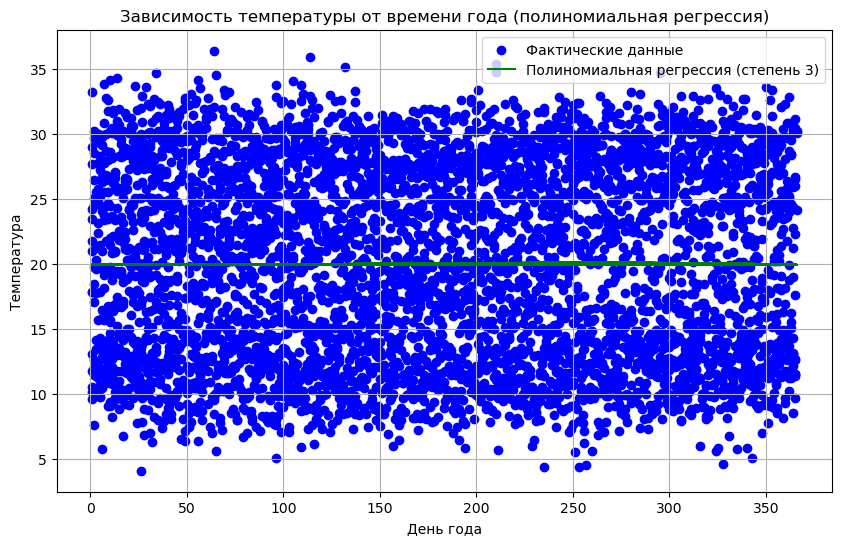

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Создание полиномиальных признаков
degree = 3  # Степень полинома
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Обучение модели полиномиальной регрессии
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_poly_pred = poly_reg.predict(X_poly)

# Оценка качества модели
mse = mean_squared_error(y, y_poly_pred)
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')

# Построение графика
plt.figure(figsize=(10, 6))

# Данные
plt.scatter(data['DayOfYear'], y, color='blue', label='Фактические данные')

# Полиномиальная регрессия
plt.plot(data['DayOfYear'], y_poly_pred, color='green', label=f'Полиномиальная регрессия (степень {degree})')

# Оформление графика
plt.xlabel('День года')
plt.ylabel('Температура')
plt.title('Зависимость температуры от времени года (полиномиальная регрессия)')
plt.legend()
plt.grid(True)
plt.show()


Задание 1.4

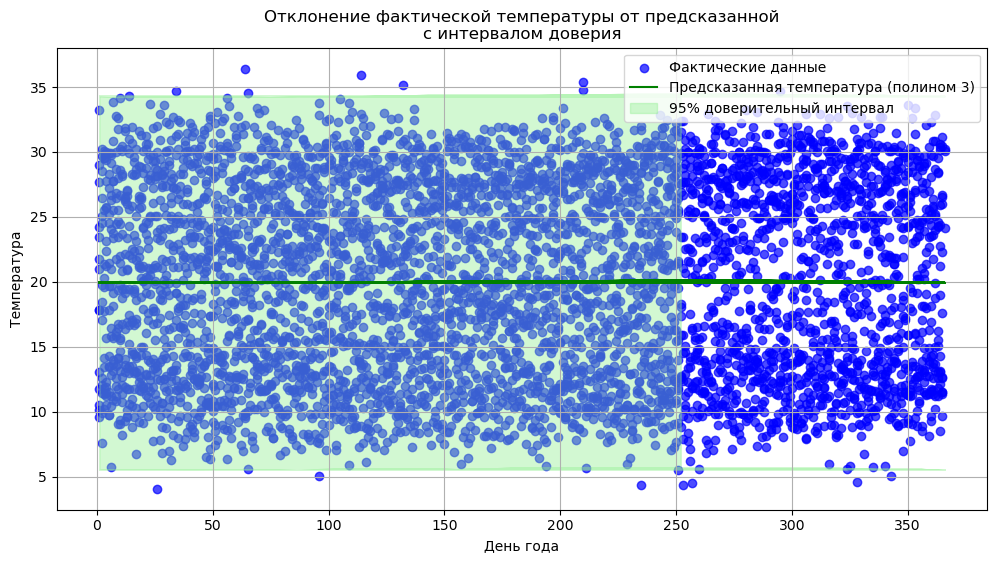

In [4]:
from scipy.stats import t
import numpy as np

# Вычисление ошибок модели
residuals = y - y_poly_pred
std_error = np.std(residuals)

# Доверительный интервал
confidence_level = 0.95
n = len(y)
dof = n - degree - 1  # Число степеней свободы
t_crit = t.ppf((1 + confidence_level) / 2, dof)

# Интервал
confidence_interval = t_crit * std_error

# Построение графика
plt.figure(figsize=(12, 6))

# Фактические данные
plt.scatter(data['DayOfYear'], y, color='blue', label='Фактические данные', alpha=0.7)

# Предсказания
plt.plot(data['DayOfYear'], y_poly_pred, color='green', label=f'Предсказанная температура (полином {degree})')

# Интервалы доверия
plt.fill_between(data['DayOfYear'], 
                 y_poly_pred - confidence_interval, 
                 y_poly_pred + confidence_interval, 
                 color='lightgreen', alpha=0.4, label='95% доверительный интервал')

# Настройки графика
plt.title('Отклонение фактической температуры от предсказанной\nс интервалом доверия')
plt.xlabel('День года')
plt.ylabel('Температура')
plt.legend()
plt.grid(True)
plt.show()
